In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


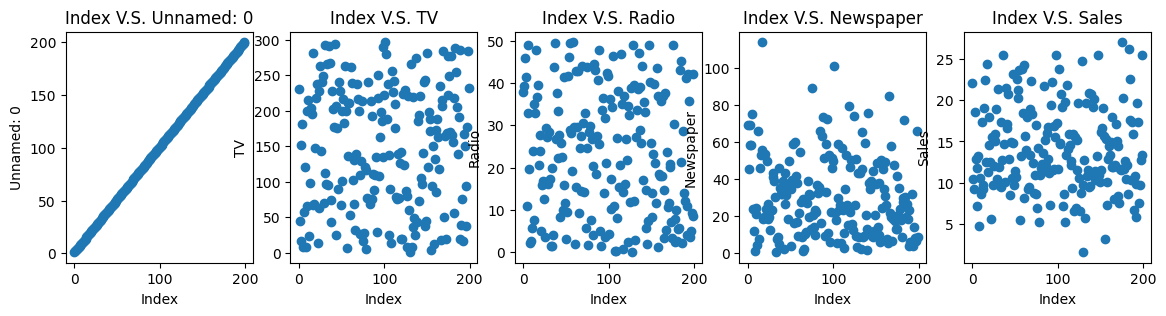

In [3]:
plt.figure(figsize=(14, 3))

for i, feature in enumerate(df.columns):
    plt.subplot(1,5,(i+1))
    plt.scatter(df.index, df[feature])
    plt.xlabel("Index")
    plt.ylabel(f"{feature}")
    plt.title(f"Index V.S. {feature}")

plt.show()

### Before you drop, you should always write down the reason why you do this

- It's for your futher review
- also for aother people who wants to read & understand your code

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


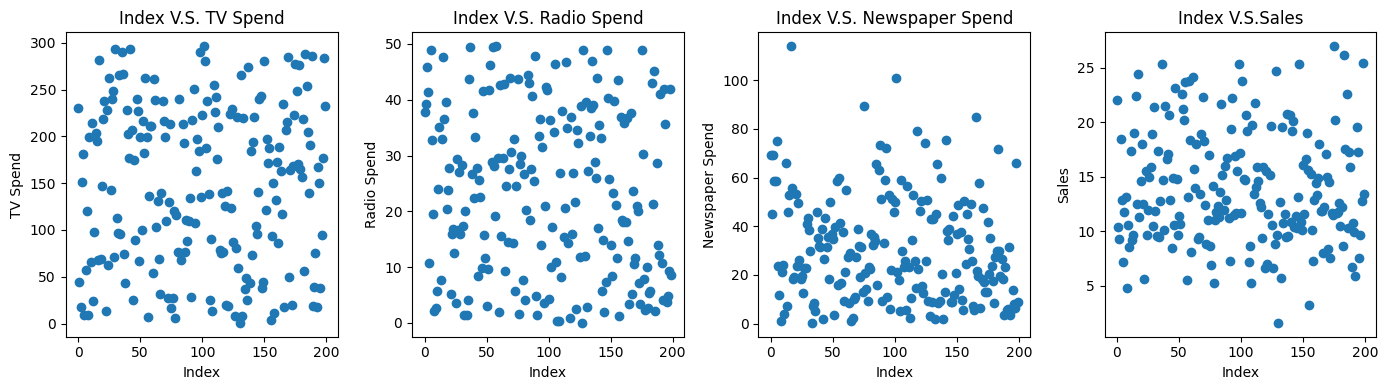

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

axes[0].plot(df.index, df['TV'], 'o')
axes[0].set_title("Index V.S. TV Spend")
axes[0].set_ylabel("TV Spend")
axes[0].set_xlabel("Index")

axes[1].plot(df.index, df['Radio'], 'o')
axes[1].set_title("Index V.S. Radio Spend")
axes[1].set_ylabel("Radio Spend")
axes[1].set_xlabel("Index")

axes[2].plot(df.index, df['Newspaper'], 'o')
axes[2].set_title("Index V.S. Newspaper Spend")
axes[2].set_ylabel("Newspaper Spend")
axes[2].set_xlabel("Index")

axes[3].plot(df.index, df['Sales'], 'o')
axes[3].set_title("Index V.S.Sales")
axes[3].set_ylabel("Sales")
axes[3].set_xlabel("Index")

plt.tight_layout()
plt.show()

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Histogram Analysis

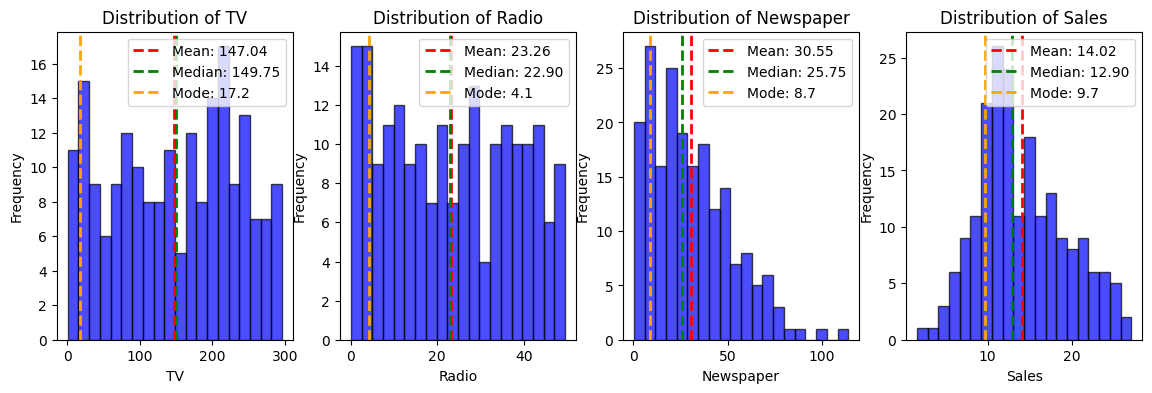

In [7]:
# Create the histogram
plt.figure(figsize=(14, 4))
for i, feature in enumerate(df.columns):
    plt.subplot(1,4,i+1)
    plt.hist(df[feature], bins=20, color='blue', edgecolor='black', alpha=0.7)
    feature_mean = df[feature].mean()
    feature_median = df[feature].median()
    feature_mode = df[feature].mode()[0]
    plt.axvline(feature_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {feature_mean:.2f}')
    plt.axvline(feature_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {feature_median:.2f}')
    plt.axvline(feature_mode, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {feature_mode}')
    plt.xlabel(f"{feature}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
    plt.legend()

# Show the plot
plt.show()

# Check Noise and Denoise

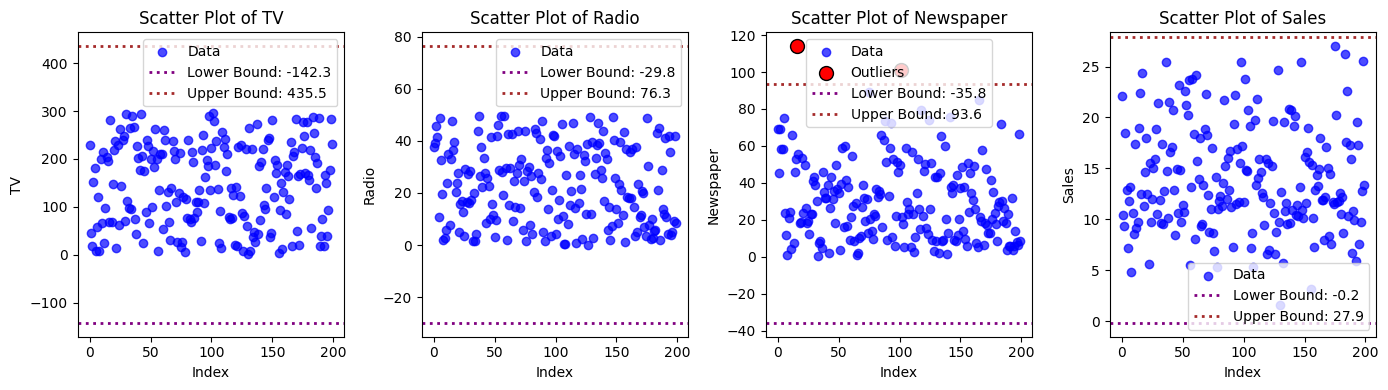

In [8]:
plt.figure(figsize=(14, 4))

for i, feature in enumerate(df.columns):
    # Calculate IQR-based noise (outliers)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    
    # Create subplot
    plt.subplot(1, 4, i + 1)

    # Scatter plot for all data points
    plt.scatter(df.index, df[feature], color='blue', label='Data', alpha=0.7)

    # Highlight outliers in red
    if not outliers.empty:
        plt.scatter(outliers.index, outliers, color='red', edgecolors='black', s=100, label='Outliers')

    # Plot IQR bounds
    plt.axhline(lower_bound, color='purple', linestyle='dotted', linewidth=2, label=f'Lower Bound: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='brown', linestyle='dotted', linewidth=2, label=f'Upper Bound: {upper_bound:.1f}')
    
    # Labels and title
    plt.xlabel("Index")
    plt.ylabel(f"{feature}")
    plt.title(f"Scatter Plot of {feature}")
    plt.legend()

# Show scatter plots
plt.tight_layout()
plt.show()

In [9]:
df[df['Newspaper'] > 93.6]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [10]:
df = df[df['Newspaper'] <= 93.6]

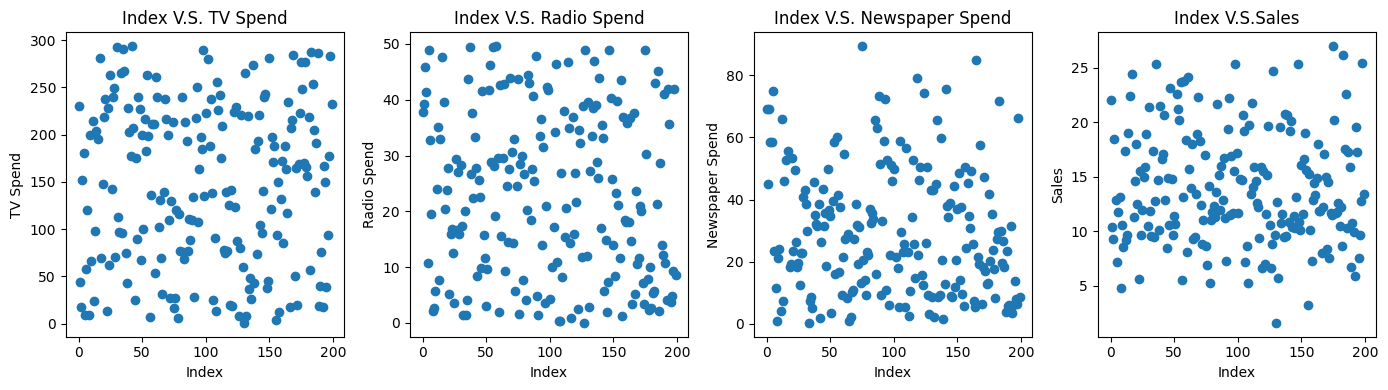

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))

axes[0].plot(df.index, df['TV'], 'o')
axes[0].set_title("Index V.S. TV Spend")
axes[0].set_ylabel("TV Spend")
axes[0].set_xlabel("Index")

axes[1].plot(df.index, df['Radio'], 'o')
axes[1].set_title("Index V.S. Radio Spend")
axes[1].set_ylabel("Radio Spend")
axes[1].set_xlabel("Index")

axes[2].plot(df.index, df['Newspaper'], 'o')
axes[2].set_title("Index V.S. Newspaper Spend")
axes[2].set_ylabel("Newspaper Spend")
axes[2].set_xlabel("Index")

axes[3].plot(df.index, df['Sales'], 'o')
axes[3].set_title("Index V.S.Sales")
axes[3].set_ylabel("Sales")
axes[3].set_xlabel("Index")

plt.tight_layout()
plt.show()

# Correlation Analysis

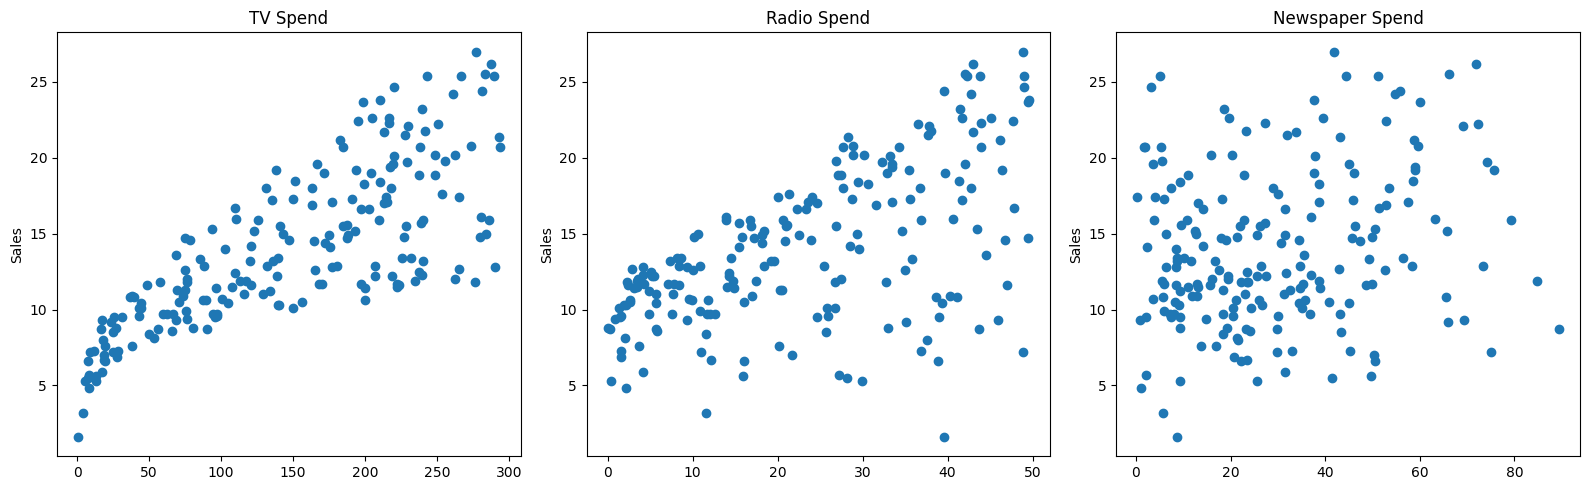

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout()
plt.show()

In [13]:
tv_corr = df['TV'].corr(df['Sales'])
tv_corr

np.float64(0.7791208573985774)

In [14]:
tv_corr = df['Sales'].corr(df['TV'])
tv_corr

np.float64(0.7791208573985775)

In [15]:
radio_corr = df['Radio'].corr(df['Sales'])
radio_corr

np.float64(0.5767476834229015)

In [16]:
np_corr = df['Newspaper'].corr(df['Sales'])
np_corr

np.float64(0.21955467558031128)

# Linear Regression

In [17]:
X = df['TV'] # Normally, cap X indicates multiple features, and low x indicate one feature. We will use cap X through the note and practice.
y = df['Sales']
x_mean = X.mean() # 146.688
y_mean = y.mean() # 13.98

In [18]:
df['x_diff'] = df['TV'] - x_mean
df['y_diff'] = df['Sales'] - y_mean
df['mult'] = df['x_diff'] * df['y_diff']
df['x_diff_square'] = df['x_diff'] * df['x_diff']

In [19]:
B1 = (df['mult'].sum())/(df['x_diff_square'].sum())
B0 = y_mean - B1*x_mean
print(f"Calculated B1: {B1}")
print(f"Calculated B0: {B0}")

Calculated B1: 0.047381029380386394
Calculated B0: 7.030561456400218


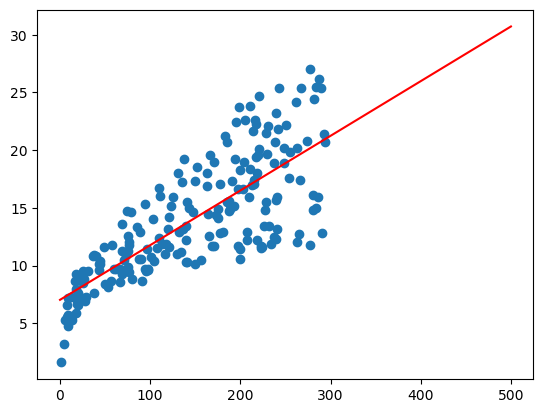

In [20]:
potential_spend = np.linspace(0,500,100)
predicted_sales = 0.047381029380386394*potential_spend + 7.030561456400218
plt.scatter(x='TV', y='Sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')
plt.show()

In [21]:
X = df['TV'] # Normally, cap X indicates multiple features, and low x indicate one feature. We will use cap X through the note and practice.
y = df['Sales']

# y = mx + b
# y = B1x + B0
B1, B0 = np.polyfit(X,y,deg=1) # sovling 1st degree polynomial function to find B1 and B0

# Print the coefficients
print(f"Calculated B1 using NumPy: {B1}")
print(f"Calculated B0 using NumPy: {B0}")

Calculated B1 using NumPy: 0.04738102938038645
Calculated B0 using NumPy: 7.030561456400215


In [22]:
# X = df['TV'].values.reshape(-1, 1)  # Convert to NumPy array and reshape
X = df[['TV']]
y = df['Sales'].values  # Convert to NumPy array (optional but good practice)

model = LinearRegression()
model.fit(X, y)

# Get coefficients
B1_sklearn = model.coef_[0]  # Slope
B0_sklearn = model.intercept_  # Intercept

# Print the coefficients
print(f"Calculated B1 using Scikit-Learn: {B1_sklearn:.4f}")
print(f"Calculated B0 using Scikit-Learn: {B0_sklearn:.4f}")

Calculated B1 using Scikit-Learn: 0.0474
Calculated B0 using Scikit-Learn: 7.0306


# Predict the sale when TV Spend is 170

In [23]:
spend = 170
predicted_sales = 0.04738102938038645*spend + 7.030561456400215
predicted_sales

15.08533645106591

# Model Residual Standard Error, RSE

- Actual sales in the market deviate from the true regression line by 3260 Units, on average.
- If coefficient(B0 & B1) are accurate, the prediction of sales on the basis of TV advertising would still be off 3260 units.
- Whether or not 3260 units is an acceptable prediction error depends on the problem context.
- The average value of sales is around 14,000 units, and so the percentage error is 3260/14000 = 23%.

In [24]:
# Compute Mean Squared Error (MSE)
X = df[['TV']]
y = df['Sales'].values
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

# Compute Residual Standard Error (RSE)
n = len(df['TV'])
RSE = np.sqrt(mse * (n / (n - 2)))

# Print the result
print(f"Residual Standard Error (RSE) using Scikit-Learn: {RSE:.4f}")

Residual Standard Error (RSE) using Scikit-Learn: 3.2656


# $R^2$ Statistic

In [25]:
RSS = np.sum((df["Sales"] - y_pred) ** 2)

# Compute TSS (Total Sum of Squares)
TSS = np.sum((df["Sales"] - np.mean(df["Sales"])) ** 2)

# Compute R-squared (R2)
R2 = 1 - (RSS / TSS)

# Print result
print(f"R-squared (R2): {R2:.4f}")

R-squared (R2): 0.6070


# Coefficient Standard Error, SE

In [26]:
x_mean = df['TV'].mean()
y_mean = df['Sales'].mean()

# Compute x_diff, y_diff, and squared terms
df["x_diff"] = df["TV"] - x_mean
df["y_diff"] = df["Sales"] - y_mean
df["x_diff_sq"] = df["x_diff"] ** 2
df["xy_diff_mult"] = df["x_diff"] * df["y_diff"]

# Compute slope (B1) and intercept (B0)
B1 = df["xy_diff_mult"].sum() / df["x_diff_sq"].sum()
B0 = y_mean - (B1 * x_mean)

# Compute predicted scores
df["Predict_Sales"] = B1 * df["TV"] + B0

# Compute residuals
df["Residuals"] = df["Sales"] - df["Predict_Sales"]

# Compute Residual Sum of Squares (RSS)
RSS = (df["Residuals"] ** 2).sum()

# Compute Residual Standard Error (RSE)
n = len(df)
RSE = np.sqrt(RSS / (n - 2))

# Compute Standard Error for Slope (SE_B1)
SE_B1 = RSE / np.sqrt(df["x_diff_sq"].sum())

# Compute Standard Error for Intercept (SE_B0)
SE_B0 = RSE * np.sqrt((1 / n) + (x_mean ** 2 / df["x_diff_sq"].sum()))

# Print Results
print(f"Calculated B1 (Slope): {B1:.4f}")
print(f"Calculated B0 (Intercept): {B0:.4f}")
print(f"Standard Error of Slope (SE_B1): {SE_B1:.4f}")
print(f"Standard Error of Intercept (SE_B0): {SE_B0:.4f}")

Calculated B1 (Slope): 0.0474
Calculated B0 (Intercept): 7.0306
Standard Error of Slope (SE_B1): 0.0027
Standard Error of Intercept (SE_B0): 0.4620


# Confidence Interval

In [27]:
print(f"B0 range will be [{B0 - 2*SE_B0:.4f},{B0 + 2*SE_B0:.4f}]")
print(f"B1 range will be [{B1 - 2*SE_B1:.4f},{B1 + 2*SE_B1:.4f}]")

B0 range will be [6.1066,7.9545]
B1 range will be [0.0419,0.0528]


# Hypothesis T-Test

In [28]:
# Extract independent and dependent variables
X = df['TV'].values.reshape(-1, 1)
y = df['Sales']

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Compute Residual Standard Error (RSE)
RSS = np.sum((y - y_pred) ** 2)
n = len(y)
RSE = np.sqrt(RSS / (n - 2))

# Compute Standard Error of Slope (SE_B1)
SE_B1 = RSE / np.sqrt(np.sum((X - np.mean(X)) ** 2))

# Compute Standard Error of Intercept (SE_B0)
SE_B0 = RSE * np.sqrt((1 / n) + (np.mean(X) ** 2 / np.sum((X - np.mean(X)) ** 2)))
print(model.intercept_)
print(SE_B0)
# Compute t-values
t_B1 = model.coef_[0] / SE_B1
t_B0 = model.intercept_ / SE_B0

print(f"T-value for Slope (B1): {t_B1}")
print(f"T-value for Intercept (B0): {t_B0}")

7.030561456400211
0.46196152910484983
T-value for Slope (B1): 17.400141777699172
T-value for Intercept (B0): 15.218932775686843


# Gradient Descend

- Why Scaling Helps
    - If TV values range from 0 to 300, the gradient update can become too large → causing divergence (NaN values).
    - If values are too small, updates are negligible → slow convergence.
    - Fix: Standardization keeps values around mean = 0, std = 1, stabilizing updates.


In [29]:
# Extract features and target
X_raw = df["TV"].values  # Keep original for later conversion
y = df["Sales"].values

# Standardize X
X = (X_raw - np.mean(X_raw)) / np.std(X_raw)

# Initialize parameters
B0, B1 = 0, 0
alpha = 0.00001  # Lower learning rate for better convergence
epochs = 300000  # Increase iterations for stability
n = len(X)

cost_history = []  # Store cost function values

# Batch Gradient Descent Loop
for _ in range(epochs):
    y_pred = B0 + B1 * X
    error = y - y_pred  # Residual error

    # Compute gradients (WITH division by n)
    dB0 = -2 * np.sum(error) / n  # Gradient for B0
    dB1 = -2 * np.sum(error * X) / n  # Gradient for B1

    # Update parameters
    B0 -= alpha * dB0
    B1 -= alpha * dB1

    # Compute cost (Mean Squared Error, MSE)
    cost = np.mean(error ** 2)
    cost_history.append(cost)  # Store cost value

# Convert back to original scale
B1_original = B1 / np.std(X_raw)
B0_original = B0 - (B1_original * np.mean(X_raw))

# Print final coefficients
print(f"Optimized B0 (Intercept) using Gradient Descent (Original Scale): {B0_original:.4f}")
print(f"Optimized B1 (Slope) using Gradient Descent (Original Scale): {B1_original:.4f}")


Optimized B0 (Intercept) using Gradient Descent (Original Scale): 7.0131
Optimized B1 (Slope) using Gradient Descent (Original Scale): 0.0473


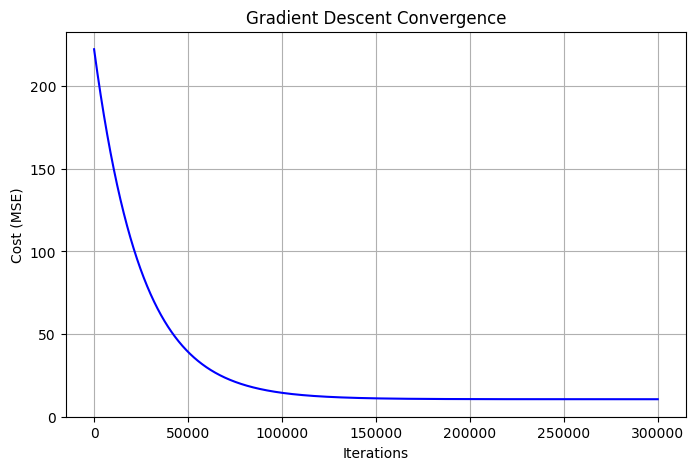

In [30]:
# Plot cost function over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

In [31]:
import pandas as pd

# Creating a DataFrame
data = {
    " ": ["Intercept", "TV's sold"],
  "Coefficient": [7.030561456400215,0.04738102938038645],
    "Standard Error": [0.461962,0.002723],
    "t-statistic":[15.218933,17.400141777699176],
}

df = pd.DataFrame(data)

display(df)

,,Coefficient,Standard Error,t-statistic
0,Intercept,7.030561,0.461962,15.218933
1,TV's sold,0.047381,0.002723,17.400142


In [32]:
import pandas as pd

data = {'TV sales Quantity': ['R.S.E', 'R2'], 'Value': [3.2656,0.6070 ]}

df = pd.DataFrame(data)

df

,TV sales Quantity,Value
0,R.S.E,3.2656
1,R2,0.6070


## Interpretations:

- at the begining, client did not know what some of the numbers represented but its was later discovered that the numbers were the amount spent on advertisment for the three medias in thousands, sales was also in thousands. 
- roi is low because the client is spending lots on adveritisement but gaining little
- you can spend less on advertisement because even when you spend nothing on advertising, you will still make 7.0306 in sales for TV
- however it might not be very accurate because of the amount of errors the model has
- correlation between tv and sales is relatively stronger
- the more you spend on tv advertisement the more sales there will be because their correlaiton is close to +1
- higher TV ad spending leads to more sales
- coefficient of TVs sold suggests that for every additional TV sold, sales increase by approximately 0.002723 units
- high t statistic shows how TV and Sales have a strong relationship
- the more you spend on tv advertisement the more variance in your sales
- they should invest heavier on TV advertising to maximize sales
- spend less on newspaper because it does better without advertising
- we should invest on radio advertisment but be careful because TV's advertisment influences sales
- even though we invest more in Tv advertisment the sales will increase but not necessarily the profit